In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as tsap
import statsmodels.tsa.arima.model as tsa_arima
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
columns = pd.read_csv('Indicadores20221007105052.csv').columns
df = pd.read_csv('Indicadores20221007105052.csv', names = columns)
df.drop(index=df.index[0], axis = 0, inplace = True)
df

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/07,111.2745518,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.7975011,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.4424238,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.5298659,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
5,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/03,111.9401523,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/05,63.61289973,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/04,61.86598396,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/03,63.94324936,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
354,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/02,61.02252106,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [4]:
df['Periodo'] = pd.to_datetime(df['Periodo'], infer_datetime_format = True)
df['Periodo']

1     2022-07-01
2     2022-06-01
3     2022-05-01
4     2022-04-01
5     2022-03-01
         ...    
351   1993-05-01
352   1993-04-01
353   1993-03-01
354   1993-02-01
355   1993-01-01
Name: Periodo, Length: 355, dtype: datetime64[ns]

In [5]:
df['Valor'] = df['Valor'].astype(float)
df['Valor']

1      111.274552
2      112.797501
3      114.442424
4      109.529866
5      111.940152
          ...    
351     63.612900
352     61.865984
353     63.943249
354     61.022521
355     60.407691
Name: Valor, Length: 355, dtype: float64

In [6]:
df_Stationality = df[['Periodo', 'Valor']]
df_Stationality['Valor (log)'] = np.log(df_Stationality['Valor'])
df_Stationality['Cambio anual'] = np.log(df_Stationality['Valor']).diff(12)
df_Stationality.set_index(['Periodo'], inplace = True)
df_Stationality = df_Stationality.sort_index(axis = 0, ascending = True)
df_Stationality = df_Stationality.dropna()
df_Stationality

,Valor,Valor (log),Cambio anual
Periodo,,,
1993-01-01,60.407691,4.101116,-0.042483
1993-02-01,61.022521,4.111243,-0.027647
1993-03-01,63.943249,4.157996,-0.028476
1993-04-01,61.865984,4.124970,-0.063042
1993-05-01,63.612900,4.152816,-0.049767
...,...,...,...
2021-03-01,111.531140,4.714304,-0.003661
2021-04-01,108.070442,4.682783,-0.013414
2021-05-01,112.064049,4.719071,-0.021001



**1. Realizar pruebas estadísticas de estacionariedad y decide el tipo de transformación de la variable**

In [7]:
af_valor, af_log, af_annual_change = adfuller(df_Stationality['Valor']),adfuller(df_Stationality['Valor (log)']),adfuller(df_Stationality['Cambio anual'])

print("t value valor: ", af_valor[0])
print("p value valor: ", af_valor[1])
print("t value log: ", af_log[0])
print("p value log: ", af_log[1])
print("t value cambio anual: ", af_annual_change[0])
print("p value cambio anual: ", af_annual_change[1])

t value valor:  -0.9848125452680835
p value valor:  0.758763194747152
t value log:  -1.256956164815709
p value log:  0.6486278087525316
t value cambio anual:  -3.7672916222942416
p value cambio anual:  0.0032602635598126847


El p value de las variables normales y logarítmicas de valor son de 0.75 y 0.65 aproximadamente, por lo que no se puede afirmar que el set de datos es estacionario dadas las condiciones d = 0 t D = 0.

Ahora, aplicando la prueba con el cambio anual el p value dado es mucho más bajo, por lo que los datos ya son estacionarios.

**2. Calibra un modelo ARIMA-SARIMA basado en pruebas y gráficos de autocorrelaciones . Explica claramente el proceso de calibración y la razón de cómo va modificando los parámetros.**

In [8]:
df_Stationality_transformed = pd.Series(np.log(df_Stationality['Valor'])).diff(12)
df_Stationality_transformed = df_Stationality_transformed.dropna()
df_Stationality_transformed = df_Stationality_transformed.to_frame(name='Cambio Anual')
df_Stationality_transformed

,Cambio Anual
Periodo,
1994-01-01,0.042483
1994-02-01,0.027647
1994-03-01,0.028476
1994-04-01,0.063042
1994-05-01,0.049767
...,...
2021-03-01,0.013491
2021-04-01,0.202340
2021-05-01,0.230376


<AxesSubplot:xlabel='Periodo'>

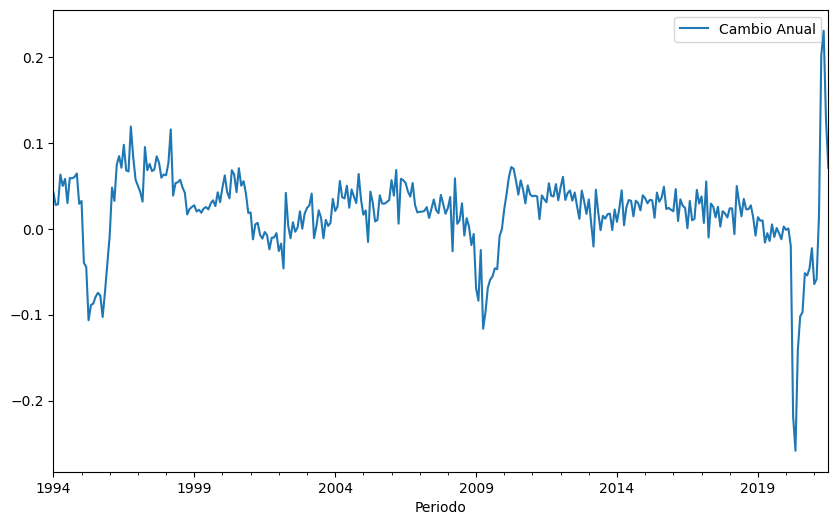

In [9]:
df_Stationality_transformed.plot(figsize=(10,6))

Función de autocorrelación (ACF)

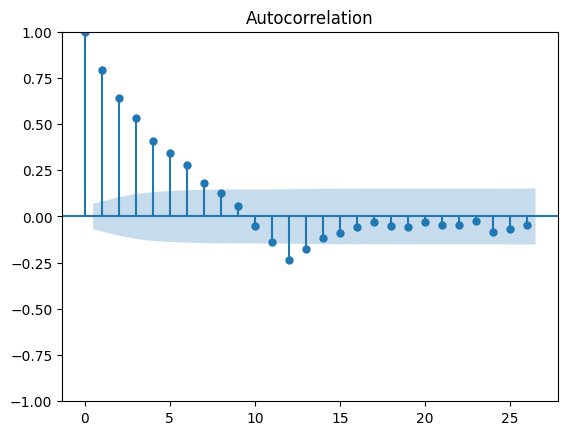

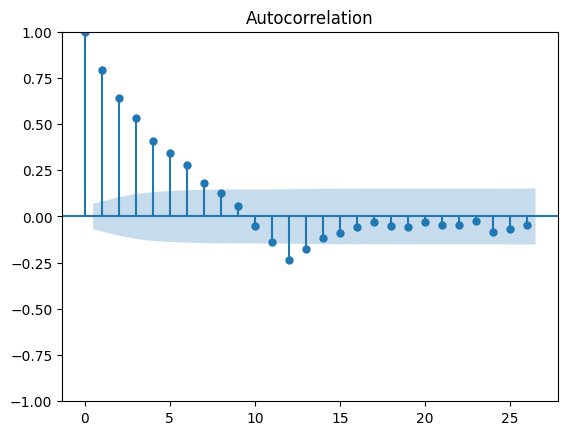

In [10]:
tsap.plot_acf(df_Stationality['Cambio anual'], alpha = 0.2)

Función parcial de auto-correlación (PACF)

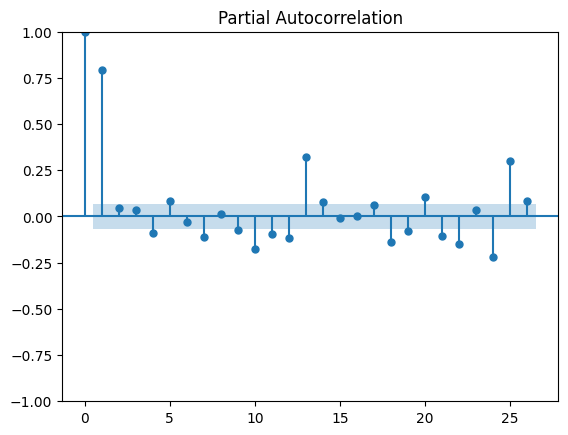

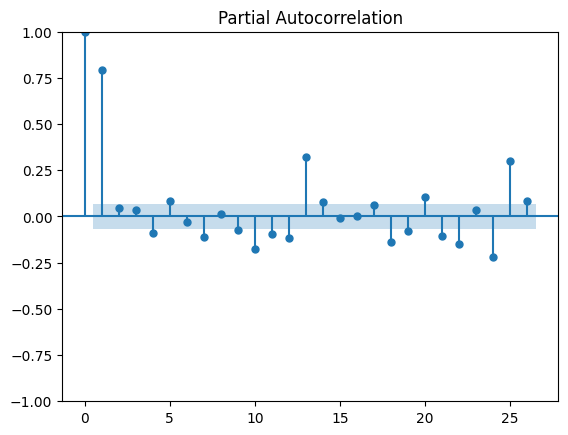

In [11]:
tsap.plot_pacf(df_Stationality['Cambio anual'], alpha=0.2)

El ACF muestra en su graficación 6 autocorrelaciones con valores significativos. Por otro lado, el PACF muestra sólo 1 autocorrelación parcial con valor significativo. Dicho esto, se puede deducir la calibración de un modelo con p = 1 y q = 0.

Modelo SARIMA

In [12]:
sarima_model = sm.tsa.statespace.SARIMAX(df_Stationality['Valor (log)'], order = (1,0,0), seasonal_order = (0,1,1,12), simple_differencing = True).fit()
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     DS12.Valor (log)   No. Observations:                  331
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 765.820
Date:                              Mon, 24 Oct 2022   AIC                          -1525.641
Time:                                      12:18:35   BIC                          -1514.234
Sample:                                  01-01-1994   HQIC                         -1521.091
                                       - 07-01-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9788      0.014     68.907      0.000       0.951       1.007
ma.S.L12      -0.8177      0.049    -16.647      0.000      -0.914      -0.721
sigma2         0.0005   1.42e-05     38.486      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  12.38   Jarque-Bera (JB):              5269.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                            -1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ACF tras calibrar el modelo SARIMA para verificar resultados

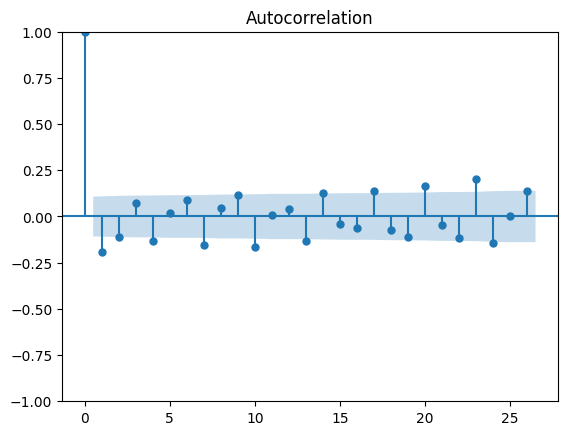

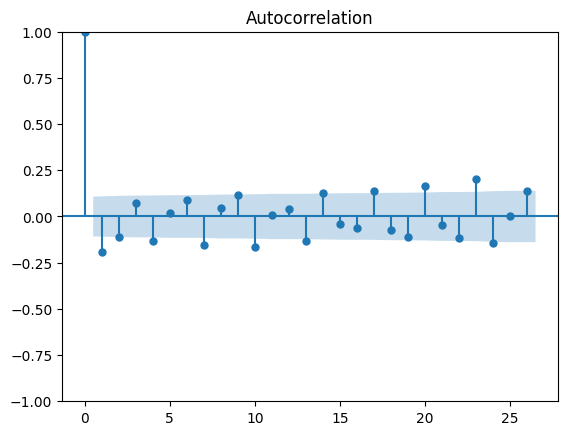

In [13]:
tsap.plot_acf(sarima_model.resid)

Prueba de ruido blanco

In [14]:
sm.stats.acorr_ljungbox(sarima_model.resid, lags = [12], return_df = True)

,lb_stat,lb_pvalue
12,50.72099,0.000001


In [15]:
forecasts = sarima_model.forecast(24)
forecasts

2021-08-01    0.068710
2021-09-01    0.036732
2021-10-01    0.033967
2021-11-01    0.029973
2021-12-01    0.016571
2022-01-01    0.034489
2022-02-01    0.033698
2022-03-01   -0.006070
2022-04-01   -0.022991
2022-05-01   -0.027387
2022-06-01   -0.011926
2022-07-01   -0.002541
2022-08-01   -0.002487
2022-09-01   -0.002435
2022-10-01   -0.002383
2022-11-01   -0.002332
2022-12-01   -0.002283
2023-01-01   -0.002234
2023-02-01   -0.002187
2023-03-01   -0.002141
2023-04-01   -0.002095
2023-05-01   -0.002051
2023-06-01   -0.002007
2023-07-01   -0.001965
Freq: MS, Name: predicted_mean, dtype: float64


**3. Interpreta los coeficientes y su significancia estadística del modelo calibrado**

La variable hace referencia a la tasa de crecimiento anual en porcentaje mensual en la economía de nuestro país. El hecho de segmentar mes con mes hará que influya al modelo considerando que se plantea un coeficiente equivalente a 0.98 multiplicado por la tasa del mes anterior en cuestión. Implementando una prueba de ruido blanco tras calibrar el modelo, se encuentra que el p-value es prácticamente de valor cercano a 0; por lo que definitivamente es una variable significativa en términos estadísticos

**4. Realiza una predicción de la variable utilizando el modelo calibrado.**

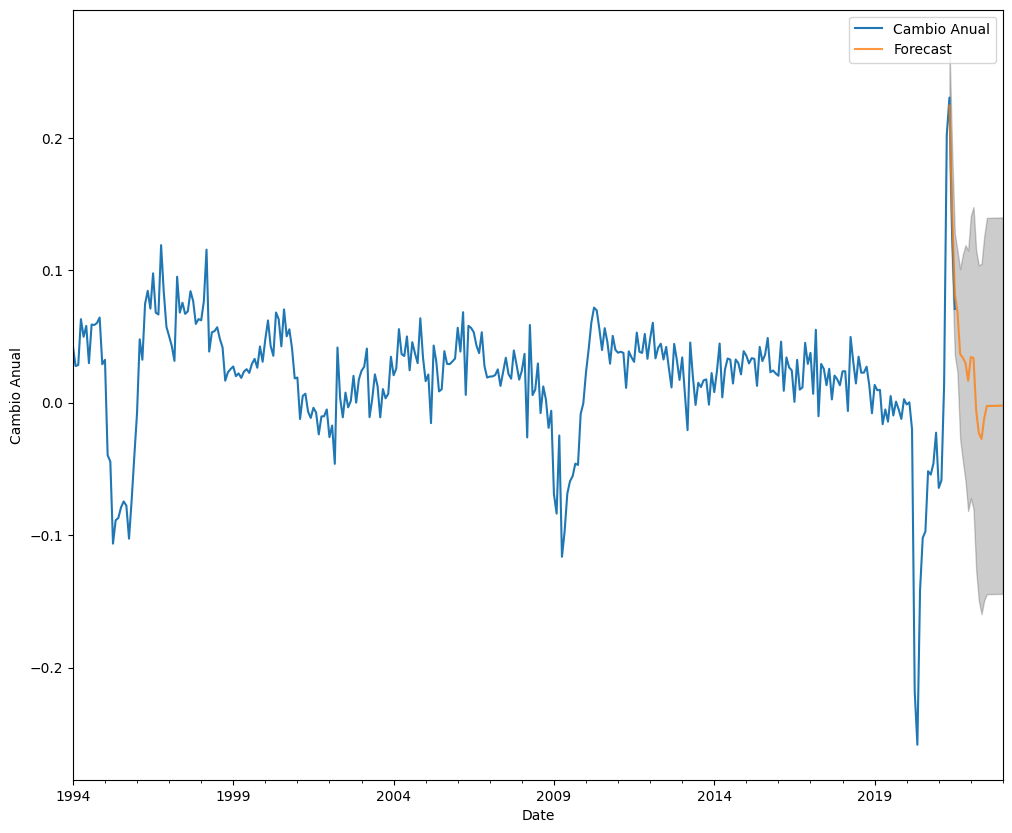

In [16]:
prediction = sarima_model.get_prediction(start = pd.to_datetime('2021-05-01'), end = pd.to_datetime('2023-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
ax = df_Stationality_transformed.plot(label = 'Observed', xlabel = 'Date', ylabel = 'Cambio Anual')
prediction.predicted_mean.plot(ax = ax, label = 'Forecast', alpha = 0.8, figsize = (12,10))
ax.fill_between(prediction_ci.index,prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()
